In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Results for 2x2 cubes

In [4]:
paper_result = "../../csvs/3ed/2x2-paper.csv"
zg_result = "../../csvs/3ed/2x2-zg-chpt-17k.csv"

In [5]:
df = pd.concat({
    'zero_goal':   pd.read_csv(zg_result),
    'paper':   pd.read_csv(paper_result),
})
df.index.set_names(['method', 'idx'], inplace=True)
df.reset_index(level=0, inplace=True)
df['speed'] = df.solve_steps/df.duration

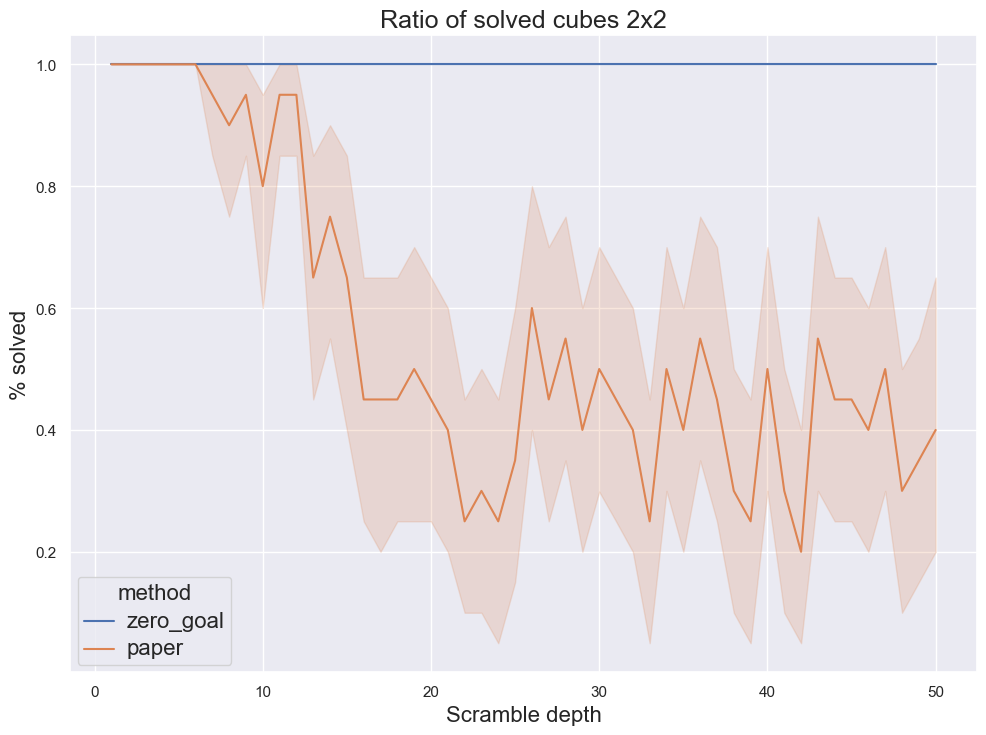

In [6]:
ax = sns.lineplot(x='depth', y='is_solved', data=df, hue='method');
ax.set_title("Ratio of solved cubes 2x2", fontsize=18)
ax.set_ylabel("% solved", fontsize=16);
ax.set_xlabel("Scramble depth", fontsize=16);
plt.setp(ax.get_legend().get_texts(), fontsize='16');
plt.setp(ax.get_legend().get_title(), fontsize='16');
plt.savefig("../c2x2-solve_ratio.png");

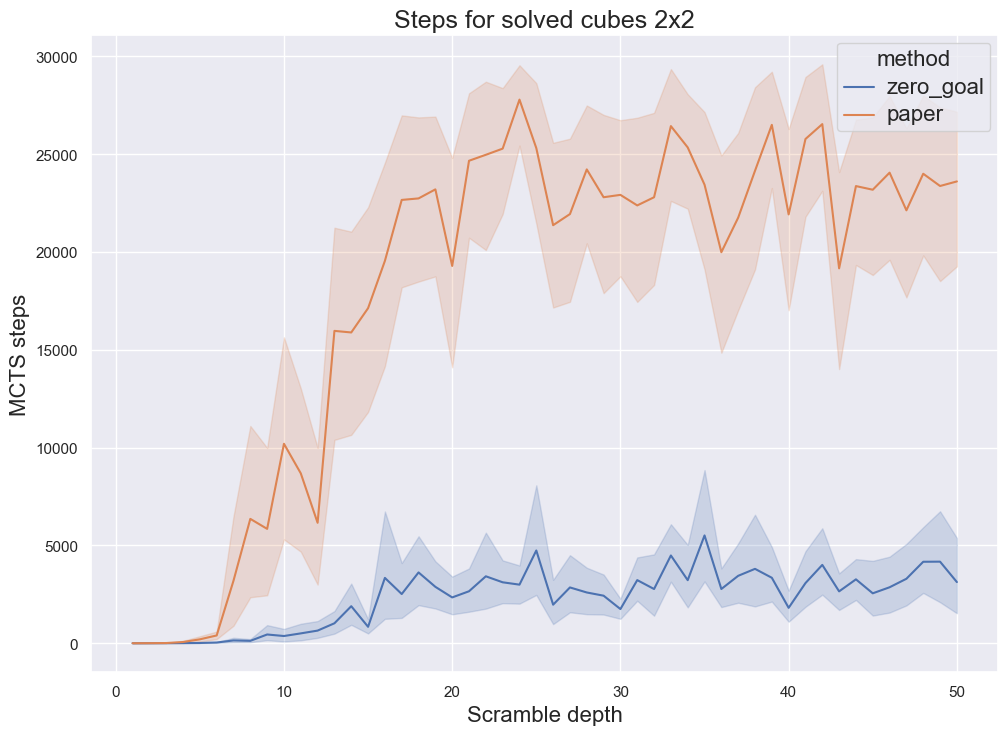

In [7]:
ax = sns.lineplot(x='depth', y='solve_steps', data=df, hue='method');
ax.set_title("Steps for solved cubes 2x2", fontsize=18)
ax.set_ylabel("MCTS steps", fontsize=16);
ax.set_xlabel("Scramble depth", fontsize=16);
plt.setp(ax.get_legend().get_texts(), fontsize='16');
plt.setp(ax.get_legend().get_title(), fontsize='16');
plt.savefig("../c2x2-search_steps.png");

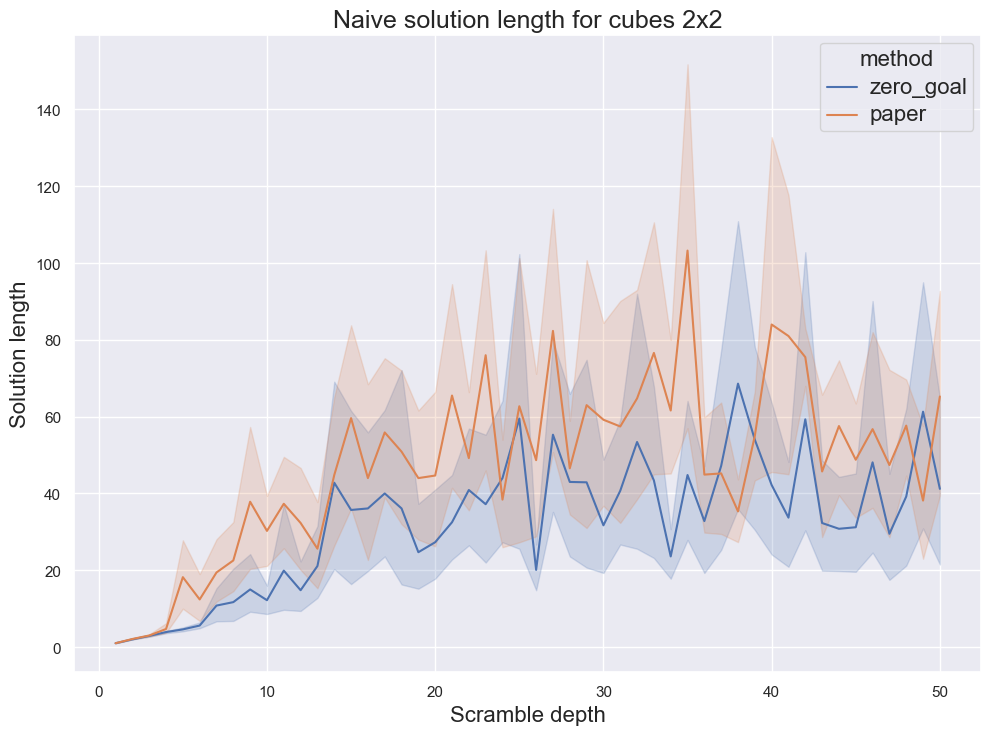

In [8]:
ax = sns.lineplot(x='depth', y='sol_len_naive', data=df[df.is_solved==1], hue='method');
ax.set_title("Naive solution length for cubes 2x2", fontsize=18)
ax.set_ylabel("Solution length", fontsize=16);
ax.set_xlabel("Scramble depth", fontsize=16);
plt.setp(ax.get_legend().get_texts(), fontsize='16');
plt.setp(ax.get_legend().get_title(), fontsize='16');
plt.savefig("../c2x2-naive_len.png");

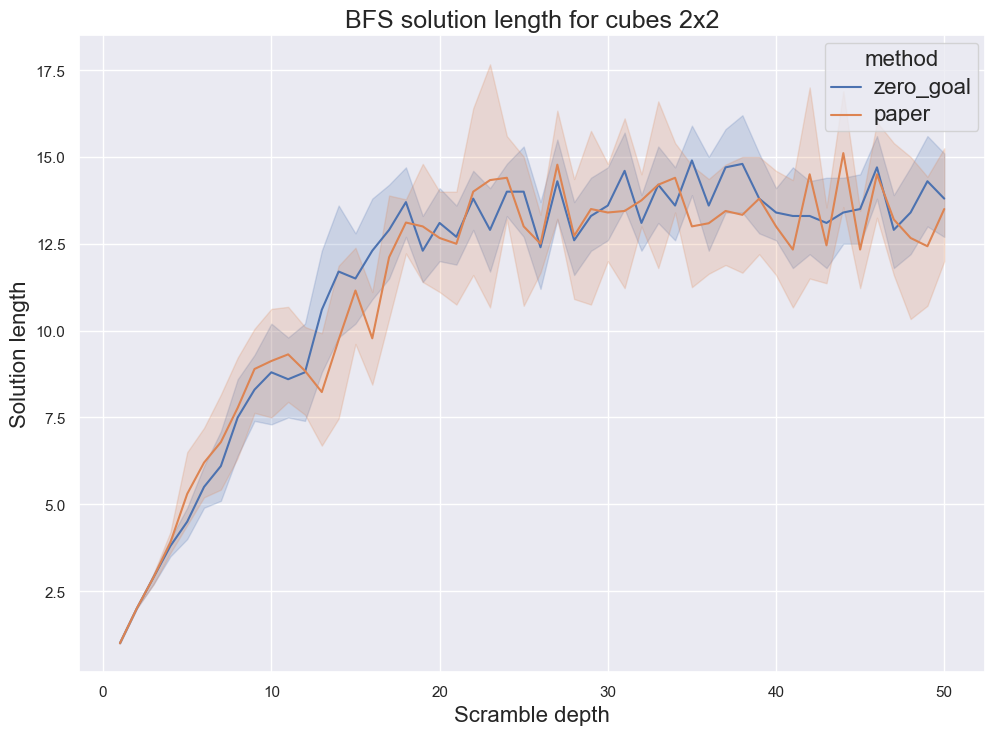

In [9]:
ax = sns.lineplot(x='depth', y='sol_len_bfs', data=df[df.is_solved==1], hue='method');
ax.set_title("BFS solution length for cubes 2x2", fontsize=18)
ax.set_ylabel("Solution length", fontsize=16);
ax.set_xlabel("Scramble depth", fontsize=16);
plt.setp(ax.get_legend().get_texts(), fontsize='16');
plt.setp(ax.get_legend().get_title(), fontsize='16');
plt.savefig("../c2x2-bfs_len.png");

# Produce csv files for book plots

In [46]:
p_df = df[df.method == 'paper'];
gb = p_df[["depth", "is_solved"]].groupby('depth').mean();

In [44]:
def save_csv(step_series, val_series, name: str):
    rdf = pd.DataFrame({
        "Wall time": 0,
        "Step": step_series,
        "Value": val_series,
    })
    rdf.to_csv(name, index=False)
    print("Created:", name)

In [45]:
save_csv(gb.index, gb.is_solved, "03-2x2-paper-ratio.csv")

Created: 03-2x2-paper-ratio.csv


In [52]:
p_df = df[df.method == 'zero_goal'];
gb = p_df[["depth", "is_solved"]].groupby('depth').mean();
save_csv(gb.index, gb.is_solved, "03-2x2-zg-ratio.csv")

Created: 03-2x2-zg-ratio.csv


In [53]:
df.columns

Index(['method', 'start_dt', 'stop_dt', 'duration', 'depth', 'scramble',
       'is_solved', 'solve_steps', 'sol_len_naive', 'sol_len_bfs',
       'tree_depth_max', 'tree_depth_mean', 'speed'],
      dtype='object')

In [57]:
s_df = df[df.is_solved == 1]

p_df = s_df[s_df.method == 'paper'];
gb = p_df[["depth", "solve_steps"]].groupby('depth').mean();
save_csv(gb.index, gb.solve_steps, "03-2x2-paper-steps.csv")

p_df = s_df[s_df.method == 'zero_goal'];
gb = p_df[["depth", "solve_steps"]].groupby('depth').mean();
save_csv(gb.index, gb.solve_steps, "03-2x2-zg-steps.csv")

Created: 03-2x2-paper-steps.csv
Created: 03-2x2-zg-steps.csv


In [59]:
s_df = df[df.is_solved == 1]

p_df = s_df[s_df.method == 'paper'];
gb = p_df[["depth", "sol_len_naive"]].groupby('depth').mean();
save_csv(gb.index, gb.sol_len_naive, "03-2x2-paper-len-naive.csv")

p_df = s_df[s_df.method == 'zero_goal'];
gb = p_df[["depth", "sol_len_naive"]].groupby('depth').mean();
save_csv(gb.index, gb.sol_len_naive, "03-2x2-zg-len-naive.csv")

Created: 03-2x2-paper-len-naive.csv
Created: 03-2x2-zg-len-naive.csv


In [60]:
s_df = df[df.is_solved == 1]

p_df = s_df[s_df.method == 'paper'];
gb = p_df[["depth", "sol_len_bfs"]].groupby('depth').mean();
save_csv(gb.index, gb.sol_len_bfs, "03-2x2-paper-len-bfs.csv")

p_df = s_df[s_df.method == 'zero_goal'];
gb = p_df[["depth", "sol_len_bfs"]].groupby('depth').mean();
save_csv(gb.index, gb.sol_len_bfs, "03-2x2-zg-len-bfs.csv")

Created: 03-2x2-paper-len-bfs.csv
Created: 03-2x2-zg-len-bfs.csv


# Results for 3x3 cubes, zg-t2 model

In [61]:
paper_result = "../../csvs/3ed/3x3-paper.csv"
zg_result = "../../csvs/3ed/3x3-zg-chpt-26k.csv"

In [62]:
df = pd.concat({
    'zero_goal':   pd.read_csv(zg_result),
    'paper':   pd.read_csv(paper_result),
})
df.index.set_names(['method', 'idx'], inplace=True)
df.reset_index(level=0, inplace=True)
df['speed'] = df.solve_steps/df.duration

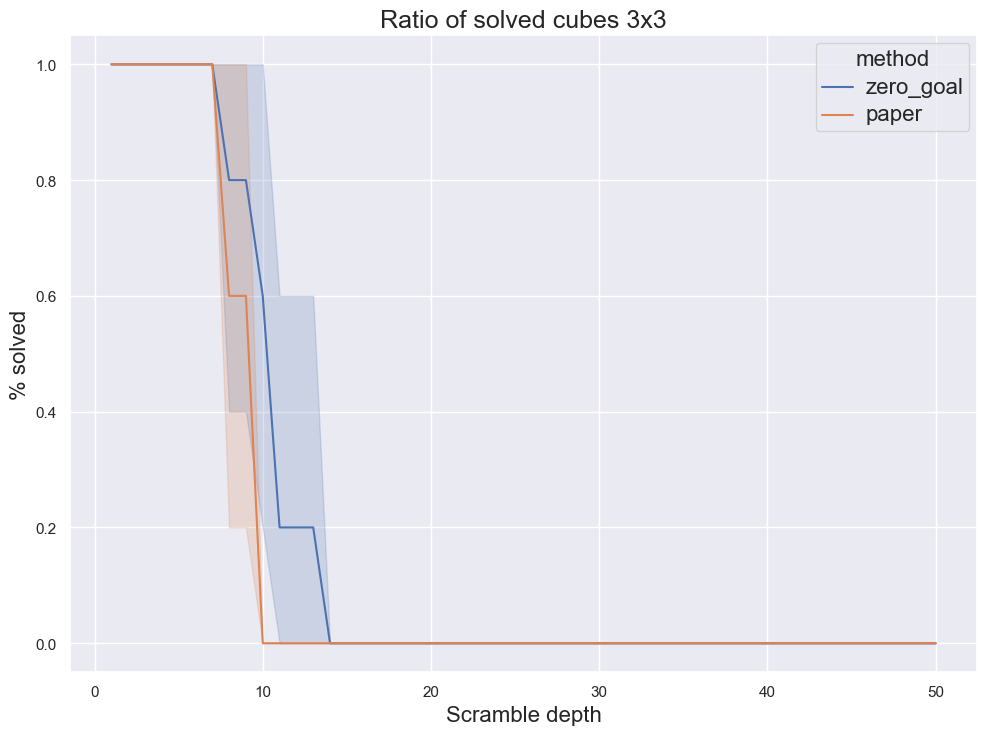

In [63]:
ax = sns.lineplot(x='depth', y='is_solved', data=df, hue='method');
ax.set_title("Ratio of solved cubes 3x3", fontsize=18)
ax.set_ylabel("% solved", fontsize=16);
ax.set_xlabel("Scramble depth", fontsize=16);
plt.setp(ax.get_legend().get_texts(), fontsize='16');
plt.setp(ax.get_legend().get_title(), fontsize='16');
plt.savefig("../c3x3-solve_ratio.png");

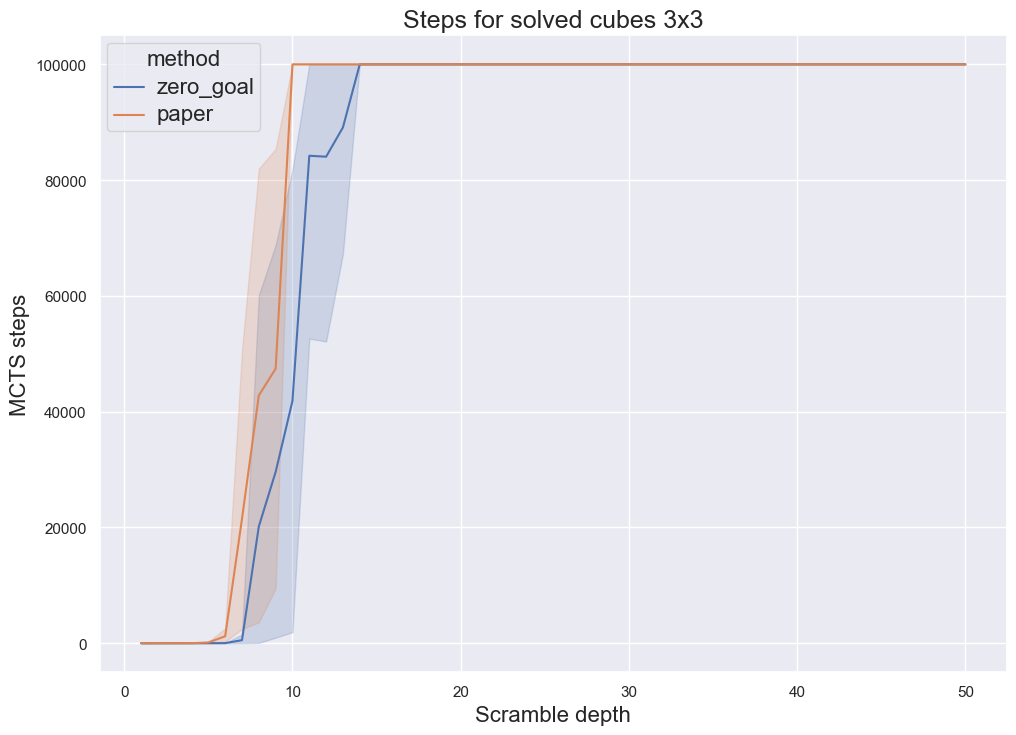

In [64]:
ax = sns.lineplot(x='depth', y='solve_steps', data=df, hue='method');
ax.set_title("Steps for solved cubes 3x3", fontsize=18)
ax.set_ylabel("MCTS steps", fontsize=16);
ax.set_xlabel("Scramble depth", fontsize=16);
plt.setp(ax.get_legend().get_texts(), fontsize='16');
plt.setp(ax.get_legend().get_title(), fontsize='16');
plt.savefig("../c3x3-search_steps.png");

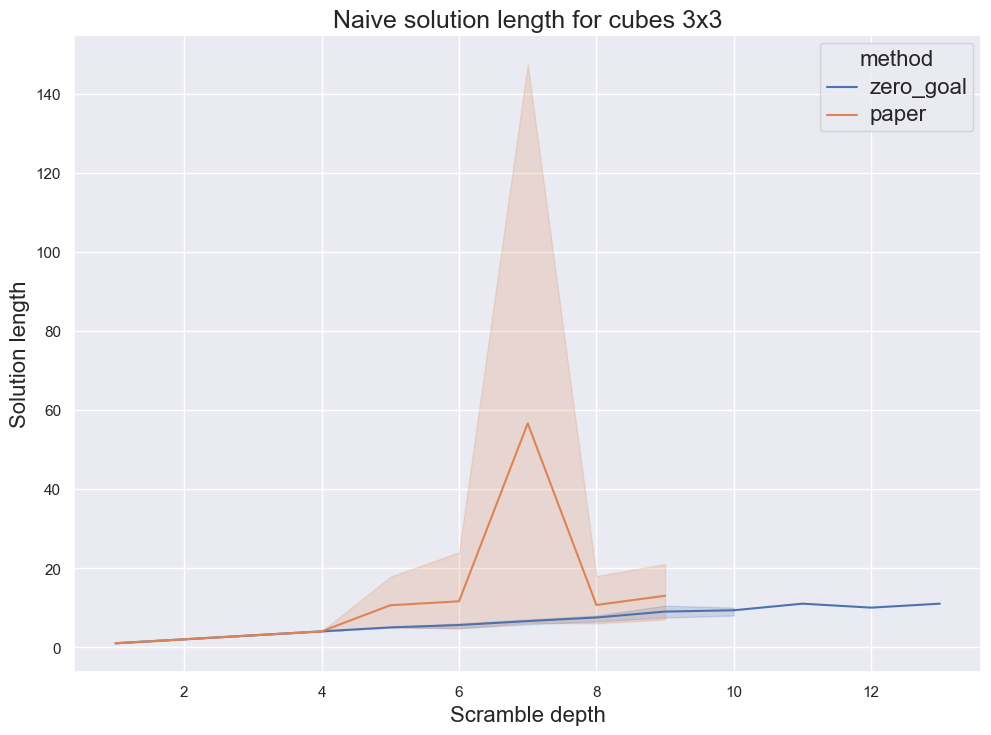

In [65]:
ax = sns.lineplot(x='depth', y='sol_len_naive', data=df[df.is_solved==1], hue='method');
ax.set_title("Naive solution length for cubes 3x3", fontsize=18)
ax.set_ylabel("Solution length", fontsize=16);
ax.set_xlabel("Scramble depth", fontsize=16);
plt.setp(ax.get_legend().get_texts(), fontsize='16');
plt.setp(ax.get_legend().get_title(), fontsize='16');
plt.savefig("../c3x3-naive_len.png");

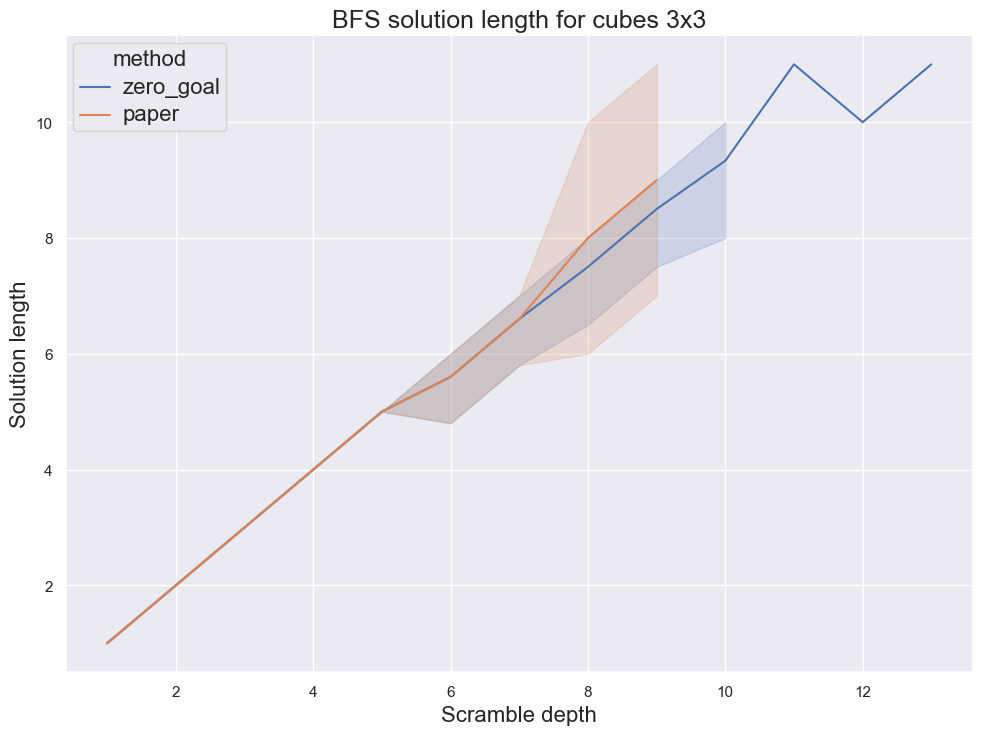

In [66]:
ax = sns.lineplot(x='depth', y='sol_len_bfs', data=df[df.is_solved==1], hue='method');
ax.set_title("BFS solution length for cubes 3x3", fontsize=18)
ax.set_ylabel("Solution length", fontsize=16);
ax.set_xlabel("Scramble depth", fontsize=16);
plt.setp(ax.get_legend().get_texts(), fontsize='16');
plt.setp(ax.get_legend().get_title(), fontsize='16');
plt.savefig("../c3x3-bfs_len.png");

# Produce csv files for book plots

In [67]:
p_df = df[df.method == 'paper'];
gb = p_df[["depth", "is_solved"]].groupby('depth').mean();

In [69]:
save_csv(gb.index, gb.is_solved, "04-3x3-paper-ratio.csv")

Created: 04-3x3-paper-ratio.csv


In [70]:
p_df = df[df.method == 'zero_goal'];
gb = p_df[["depth", "is_solved"]].groupby('depth').mean();
save_csv(gb.index, gb.is_solved, "04-3x3-zg-ratio.csv")

Created: 04-3x3-zg-ratio.csv


In [71]:
df.columns

Index(['method', 'start_dt', 'stop_dt', 'duration', 'depth', 'scramble',
       'is_solved', 'solve_steps', 'sol_len_naive', 'sol_len_bfs',
       'tree_depth_max', 'tree_depth_mean', 'speed'],
      dtype='object')

In [72]:
s_df = df[df.is_solved == 1]

p_df = s_df[s_df.method == 'paper'];
gb = p_df[["depth", "solve_steps"]].groupby('depth').mean();
save_csv(gb.index, gb.solve_steps, "04-3x3-paper-steps.csv")

p_df = s_df[s_df.method == 'zero_goal'];
gb = p_df[["depth", "solve_steps"]].groupby('depth').mean();
save_csv(gb.index, gb.solve_steps, "04-3x3-zg-steps.csv")

Created: 04-3x3-paper-steps.csv
Created: 04-3x3-zg-steps.csv


In [73]:
s_df = df[df.is_solved == 1]

p_df = s_df[s_df.method == 'paper'];
gb = p_df[["depth", "sol_len_naive"]].groupby('depth').mean();
save_csv(gb.index, gb.sol_len_naive, "04-3x3-paper-len-naive.csv")

p_df = s_df[s_df.method == 'zero_goal'];
gb = p_df[["depth", "sol_len_naive"]].groupby('depth').mean();
save_csv(gb.index, gb.sol_len_naive, "04-3x3-zg-len-naive.csv")

Created: 04-3x3-paper-len-naive.csv
Created: 04-3x3-zg-len-naive.csv


In [74]:
s_df = df[df.is_solved == 1]

p_df = s_df[s_df.method == 'paper'];
gb = p_df[["depth", "sol_len_bfs"]].groupby('depth').mean();
save_csv(gb.index, gb.sol_len_bfs, "04-3x3-paper-len-bfs.csv")

p_df = s_df[s_df.method == 'zero_goal'];
gb = p_df[["depth", "sol_len_bfs"]].groupby('depth').mean();
save_csv(gb.index, gb.sol_len_bfs, "04-3x3-zg-len-bfs.csv")

Created: 04-3x3-paper-len-bfs.csv
Created: 04-3x3-zg-len-bfs.csv
